In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Binary Images**

**For these exercises, please download the 'binary_objects.png' image and the 'binary_operations.png' image from the same GitHub folder. We will be doing some operations on them.**

**First, we'll see how we can change an image into a binary image.**

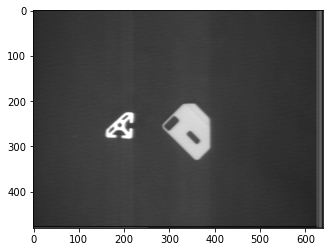

In [2]:
import cv2
original_image = cv2.imread('binary_objects.png')
grayscale = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')

**Binary images by definition only have two pixel values, 255 or 0. Convert the grayscaled image into a binary image by setting all pixels greater than 125 in value to 255. Feel free to do it both using masking, or using cv2's threshold operation.**

(480, 640)


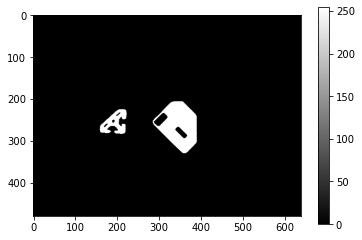

In [4]:
##
binary_image = np.ones(grayscale.shape, dtype=np.uint8) * (grayscale > 125) * 255
plt.imshow(binary_image, cmap='gray')
plt.colorbar()
print(grayscale.shape)
##

**We now have some binary images, with pixels where the object is set to 255, and non-object pixels set to 0. Before we can do processing on each object individually, we have to separate them.**

**Use OpenCV's connectedComponents to separate out the different objects. Plot the image with a different pixel value for each object.**

3


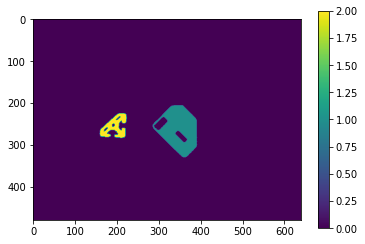

In [4]:
##
num_labels, labels_im = cv2.connectedComponents(binary_image)
print(num_labels)
plt.imshow(labels_im)
plt.colorbar()
##


**Now that each object detected has a unique pixel value, separate the objects from each other in the image. That is, create an image where we only have the first object present, and create a second image where we only have the second object present. Plot them side by side.**

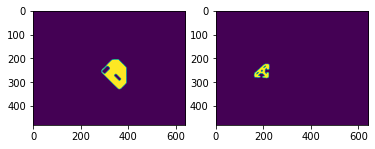

In [5]:
##
f, axarr = plt.subplots(1,2)

obj1 = labels_im.copy()
obj2 = labels_im.copy()

obj1[obj1 == 2] = 0
axarr[0].imshow(obj1)

obj2[obj2 == 1] = 0
axarr[1].imshow(obj2)
##

**Now, find the area of each of the objects in the image. You should be getting around 7691 for one object and 2064 for the other. Print out the results.**

In [6]:
##
area1 = np.sum(obj1)
obj2[obj2 == 2] = 1
area2 = np.sum(obj2)
print(area1)
print(area2)
print(np.sum(binary_image) / 255)
##

7691
2064
9755.0


**Another interesting we can do is to find the center of mass of the object itself. This is simply done by averaging the x and y coordinates of all of the pixels of that object. Compute the center of mass for the objects and print them.**

In [7]:
##
center_1 = [0, 0]
center_2 = [0, 0]
rows, cols = obj1.shape

for i in range(rows):
  for j in range(cols):
    if not obj1[i][j] == 0:
        center_1[0] += i
        center_1[1] += j
    if not obj2[i][j] == 0:
      center_2[0] += i
      center_2[1] += j

print(center_1 / area1)
print(center_2 / area2)
##

[263.58132883 349.23911065]
[256.61385659 195.30668605]


**Now, using cv2.circle(), plot the centers of the objects as a red circle (of a reasonable radius) onto the original coloured images, and verify that this visually makes sense.**

### **Binary Morphology**

**Now we'll do some simple exploration with binary morphological operations. First load the 'binary_operations.png' image.**

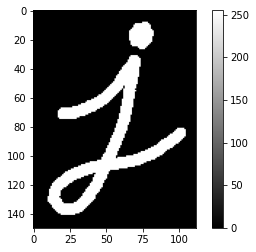

In [8]:
binary_image = cv2.imread('binary_operations.png', 0)
plt.imshow(binary_image, cmap='gray')
plt.colorbar()

**We'll first do some simple binary erosion. Create a 5x5 kernel of ones, with dtype=uint8. Then, using OpenCV's cv2.erode(), perform binary erosion with the binary image. Plot the results.**

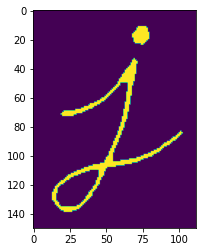

In [9]:
##
kernel = np.ones((5, 5), dtype=np.uint8)
erosion = cv2.erode(binary_image, kernel)
plt.imshow(erosion)
##

**Now, using the same kernel, perform binary dilation, using cv2.dilate. Plot the results.**

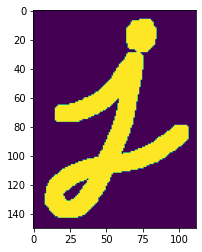

In [10]:
##
dilation = cv2.dilate(binary_image, kernel)
plt.imshow(dilation)
##

**Subtract the eroded image from the dilated image, and then plot it.**

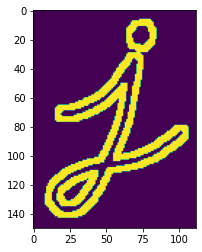

In [11]:
##
plt.imshow(dilation - erosion)
##

**Is this what you expected?**

**Now we want to see what happens when we do binary erosion and dilation in succession. Create a new image that is a copy of the original binary image, but with around 1% of the pixels randomly flipped.**

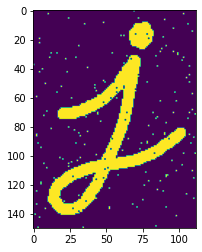

In [12]:
import random

##
salt_and_pepper = binary_image.copy()
rows, cols = salt_and_pepper.shape

for i in range(rows):
  for j in range(cols):
    if random.random() < 0.01:
      salt_and_pepper[i][j] = 255 - salt_and_pepper[i][j]

plt.imshow(salt_and_pepper)

##

**Now, using the same 5x5 kernel, perform binary erosion on the image with random pixels flipped. Plot the result.**

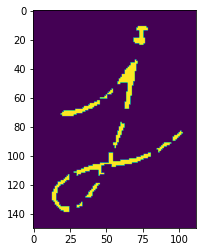

In [13]:
##
erosion2 = cv2.erode(salt_and_pepper, kernel)
plt.imshow(erosion2)
##

**What do you notice? Is this what you expect?**

**Now apply binary dilation to the eroded image above, and plot the result.**

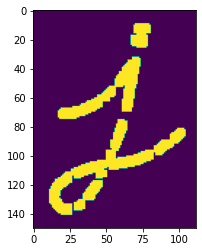

In [14]:
##
opening = cv2.dilate(erosion2, kernel)
plt.imshow(opening)
##

**This is binary opening, where we use erosion followed by dilation. Is this what you expected? When do we want to use binary opening?**

**Let's do the same thing, but now first with dilation then erosion. Here, perform binary dilation using the image with the pixels flipped and the same 5x5 kernel. Plot the results.**

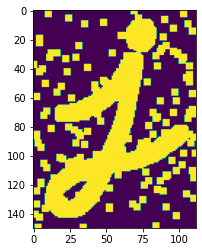

In [15]:
##
dilation2 = cv2.dilate(salt_and_pepper, kernel)
plt.imshow(dilation2)
##

**What do you notice? Is this what you expected?**

**Now apply binary erosion to the image above, and plot the results.**

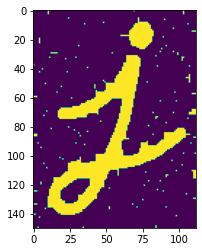

In [16]:
##
closing = cv2.erode(dilation2, kernel)
plt.imshow(closing)
##

**This is binary closing, where we use dilation followed by erosion. Is this what you expected? When do we want to use binary closing?**